In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [79]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [80]:
df_train.head()

,id,label,Field_1,Field_2,Field_3,Field_4,Field_5,Field_6,Field_7,Field_8,...,partner5_H,partner5_K,partner5_L,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82
0,0,1,2019-07-24T03:39:02.854Z,2019-07-31T20:10:02Z,1.0,GH,2018-12-27,2018-12-27,2019-01-01,2019-07-31,...,0.0,0.0,0.0,cb1,1.0,NaN,NaN,NaN,NaN,1
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,4,1.0,NaN,NaN,NaN,NaN,1
2,2,0,2019-01-17T07:15:26.367Z,2019-01-17T07:17:45Z,2.0,T1,2019-01-17,2019-01-17,2019-01-01,2019-12-31,...,0.0,0.0,0.0,1,1.0,33.0,10.769445,6.466667,0.0,2
3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3
4,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3


In [81]:
df_train.isnull().sum()

id              0
label           0
Field_1     27466
Field_2     27466
Field_3     27466
            ...  
Field_78    16633
Field_79    25248
Field_80    16710
Field_81    17049
Field_82        0
Length: 195, dtype: int64

In [82]:
df_train.shape

(53030, 195)

In [83]:
df_train.columns

Index(['id', 'label', 'Field_1', 'Field_2', 'Field_3', 'Field_4', 'Field_5',
       'Field_6', 'Field_7', 'Field_8',
       ...
       'partner5_H', 'partner5_K', 'partner5_L', 'brief', 'num_of_phone',
       'Field_78', 'Field_79', 'Field_80', 'Field_81', 'Field_82'],
      dtype='object', length=195)

### Clean Data

##### Xử lí số liệu

Label

In [84]:
df_train["label"].value_counts()

0    36234
1    16796
Name: label, dtype: int64

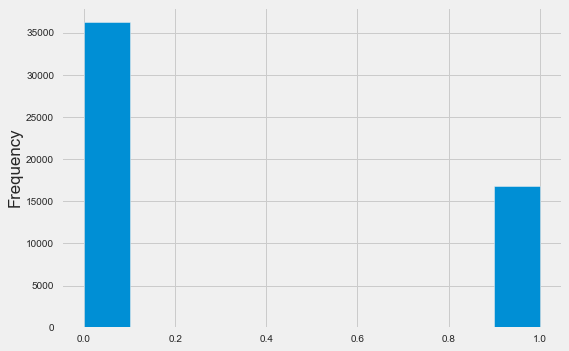

In [85]:
df_train["label"].astype(int).plot.hist();

Nhận xét:
    - Mất cân bằng: Có nhiều khoản vay trả đúng hạn hơn so với những khoản vay không được hoàn trả

### Xem các giá trị còn thiếu và phần trăm 

xem theo cột...

In [86]:
# Hàm tính tổng các giá trị còn thiếu
def missing_values(df):
    mis_val = df.isnull().sum() #tổng các giá trị còn thiếu
    mis_val_per = 100 * df.isnull().sum()/len(df) #Phần trăm các giá trị còn thiếu
    mis_val_table = pd.concat([mis_val, mis_val_per], axis=1) #Tạo thành bảng để thể hiện 2 giá trị trên
    mis_val_table_rename = mis_val_table.rename(
    columns = {0: "Thiếu", 1 : "Chiếm %"})
    #Sắp xếp bảng theo tỉ lệ phần trăm giảm dần
    mis_val_table_rename = mis_val_table_rename[mis_val_table_rename.iloc[:, 1] != 0].sort_values("Chiếm %", ascending=False).round(1)
    print("Có tất cả " + str(df.shape[1]) + " cột.\n"
          "Có tất cả " + str(mis_val_table_rename.shape[0]) + " cột bị thiếu data")
    return mis_val_table_rename

In [87]:
missing = missing_values(df_train)
missing.head(20)

Có tất cả 195 cột.
Có tất cả 192 cột bị thiếu data


,Thiếu,Chiếm %
Field_35,46198,87.1
Field_12,45650,86.1
Field_11,45616,86.0
Field_18,44643,84.2
maCv,43882,82.7
homeTownCity,40676,76.7
homeTownCountry,40676,76.7
homeTownName,40676,76.7
homeTownState,40676,76.7
currentLocationState,39522,74.5


In [88]:
#Số lượng từng loại dữ liệu có trong cột
df_train.dtypes.value_counts()

float64    133
object      59
int64        3
dtype: int64

In [89]:
#Số lượng object(categorical) có trong mỗi cột
df_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

Field_1                   21506
Field_2                   18667
Field_4                       2
Field_5                    1901
Field_6                    1870
Field_7                    1199
Field_8                    1392
Field_9                    1929
Field_11                    836
Field_12                      7
Field_15                   1539
Field_18                   6587
Field_25                   1613
Field_32                   1527
Field_33                   1753
Field_34                   2635
Field_35                    632
gioiTinh                      2
diaChi                    21057
Field_36                     34
Field_38                      6
Field_40                    541
Field_43                   3605
Field_44                   9901
Field_45                  10957
Field_46                  14311
Field_47                      5
Field_48                  12650
Field_49                  12818
Field_54                     44
Field_55                    220
Field_56

#### Bộ train

Biến các kiểu categorical ở trên kiểu số học

In [90]:
train_labels = df_train["label"]
# Căn chỉnh dữ liệu trong hai bộ train và test. Giữ lại các cột có trong cả hai cột dữ liệu
df_train, df_test = df_train.align(df_train, join="inner", axis=1)
# Thêm mục "label"
df_train["label"] = train_labels

print("Bộ dữ liệu train: ", df_train.shape)
print("Bộ dữ liệu test: ", df_test.shape)

Bộ dữ liệu train:  (53030, 195)
Bộ dữ liệu test:  (53030, 195)


Hiện tại ở hai bộ dữ liệu đều có những giá trị chung. Tuy nhiên số lượng còn nhiều, cần phải loại bỏ bớt

Điền dữ liệu còn thiếu bằng giá trị trung bình của mỗi cột

In [91]:
"Phân loại các cột dữ liệu theo kiểu"
numeric_cols = df_train.select_dtypes(['float', 'int']).columns
categoric_cols = df_train.select_dtypes('object').columns
train_numeric = df_train[numeric_cols]
train_categoric = df_train[categoric_cols]

In [92]:
# fill mising cho loại int và float
def fill_mean_train(train_numeric):
    for col in train_numeric.columns:
        mean = train_numeric[col].mean()
        train_numeric[col] = train_numeric[col].fillna(mean)
    return train_numeric
train_mean_imp = fill_mean_train(train_numeric)

In [109]:
train_mean_imp.isnull().sum()

Field_3         0
Field_10        0
Field_13        0
Field_14        0
Field_16        0
               ..
num_of_phone    0
Field_78        0
Field_79        0
Field_80        0
Field_81        0
Length: 133, dtype: int64

In [93]:
#fill mising cho loại categoric sử dụng MODE
def fill_mode_train(train_categoric):
    for col in train_categoric.columns:
        mode = train_categoric[col].mode().iloc[0]
        train_categoric[col] = train_categoric[col].fillna(mode)
    return train_categoric
train_mode_imp = fill_mode_train(train_categoric)

In [110]:
train_mode_imp.isnull().sum()

Field_1                   0
Field_2                   0
Field_4                   0
Field_5                   0
Field_6                   0
Field_7                   0
Field_8                   0
Field_9                   0
Field_11                  0
Field_12                  0
Field_15                  0
Field_18                  0
Field_25                  0
Field_32                  0
Field_33                  0
Field_34                  0
Field_35                  0
gioiTinh                  0
diaChi                    0
Field_36                  0
Field_38                  0
Field_40                  0
Field_43                  0
Field_44                  0
Field_45                  0
Field_46                  0
Field_47                  0
Field_48                  0
Field_49                  0
Field_54                  0
Field_55                  0
Field_56                  0
Field_61                  0
Field_62                  0
Field_65                  0
Field_66            

In [111]:
df_all = pd.concat([train_mean_imp, train_mode_imp], axis=1)

In [129]:
df_all["ngaySinh"]

0        1.991062e+07
1        1.988407e+07
2        1.998060e+07
3        1.988407e+07
4        1.988407e+07
             ...     
53025    1.988023e+07
53026    1.988407e+07
53027    1.988081e+07
53028    1.988407e+07
53029    1.988407e+07
Name: ngaySinh, Length: 53030, dtype: float64

# Nhóm I:

In [130]:
#xử lí date và dateTime
Date = ['Field_{}'.format(i) for i in [5, 6, 7, 8, 9, 11, 15, 25, 33, 34, 35, 40]]
DateTime = ['Field_{}'.format(i) for i in [1, 2, 43, 44]]
df_all[Date + DateTime + ['Field_34']].sample(10)
# sampl: ý nghĩa lấy bất cứ dòng nào có trong dataset

,Field_5,Field_6,Field_7,Field_8,Field_9,Field_11,Field_15,Field_25,Field_33,Field_34,Field_35,Field_40,Field_1,Field_2,Field_43,Field_44,Field_34
27971,2018-12-27,2018-12-27,2019-01-01,2019-12-31,2018-12-27,2019-10-31,2013-08-31,2018-12-27,2015-01-01,20180102,2019-10-31,2019-01-01,2017-03-24T20:10:37.62Z,2017-03-24T20:10:37.62Z,2017-03-24T14:37:56.11Z,2019-06-26T10:24:56Z,20180102
52217,2018-12-27,2018-12-27,2019-01-01,2019-12-31,2018-12-27,2019-10-31,2013-08-31,2018-12-27,2015-01-01,20180102,2019-10-31,2019-01-01,2017-03-24T20:10:37.62Z,2017-03-24T20:10:37.62Z,2017-03-24T14:37:56.11Z,2019-06-26T10:24:56Z,20180102
50971,2018-12-27,2018-12-27,2019-01-01,2019-12-31,2018-12-27,2019-10-31,2013-08-31,2018-12-27,2015-01-01,20180102,2019-10-31,2019-01-01,2017-03-24T20:10:37.62Z,2017-03-24T20:10:37.62Z,2017-03-24T14:37:56.11Z,2019-06-26T10:24:56Z,20180102
10513,2019-01-02,2019-01-02,2019-01-01,2019-12-31,2019-01-02,2019-10-31,2013-08-31,2019-01-02,2020-02-01,20180123,2019-10-31,2019-01-01,2019-01-02T03:40:19.163Z,2019-01-04T14:05:22Z,2017-02-16T11:12:09.717Z,2019-02-28T04:27:29Z,20180123
2361,2018-12-27,2018-12-27,2019-01-01,2019-12-31,2018-12-27,2019-10-31,2013-08-31,2018-12-27,2015-01-01,20180102,2019-10-31,2019-01-01,2017-03-24T20:10:37.62Z,2017-03-24T20:10:37.62Z,2017-03-24T14:37:56.11Z,2019-06-26T10:24:56Z,20180102
31570,2018-12-24,2018-12-24,2019-01-01,2019-12-31,2018-12-24,2019-10-31,2013-08-31,2018-12-24,2023-10-01,20181003,2019-10-31,2019-01-01,2018-12-24T01:23:30.448Z,2018-12-24T02:13:16Z,2017-03-24T11:06:27.72Z,2019-07-01T06:20:08Z,20181003
8532,2019-07-17,2018-12-25,2019-01-01,2019-12-31,2019-07-17,2019-10-31,2019-07-17,2019-07-17,2018-06-01,20180324,2019-10-31,2019-01-01,2019-07-17T00:24:53.132Z,2019-07-17T00:26:40Z,2017-01-20T11:16:05.99Z,2019-10-04T04:01:14.778Z,20180324
47417,2018-12-25,2018-12-25,2019-01-01,2019-12-31,2018-12-25,2019-10-31,2013-08-31,2018-12-25,2022-01-01,20170806,2019-10-31,2019-01-01,2018-12-25T14:13:02.264Z,2018-12-26T02:48:15Z,2017-08-20T04:25:21.236Z,2019-09-24T03:35:46.203Z,20170806
38037,2018-12-27,2018-12-27,2019-01-01,2019-12-31,2018-12-27,2019-10-31,2013-08-31,2018-12-27,2015-01-01,20180102,2019-10-31,2019-01-01,2017-03-24T20:10:37.62Z,2017-03-24T20:10:37.62Z,2017-03-24T14:37:56.11Z,2019-06-26T10:24:56Z,20180102
46085,2018-12-27,2018-12-27,2019-01-01,2019-12-31,2018-12-27,2019-10-31,2013-08-31,2018-12-27,2015-01-01,20180102,2019-10-31,2019-01-01,2017-03-24T20:10:37.62Z,2017-03-24T20:10:37.62Z,2017-03-24T14:37:56.11Z,2019-06-26T10:24:56Z,20180102


In [116]:
#xử lí thằng Field_34
#hàm chung cho field_34 và ngaySinh
def process_field_34(x):
    if x != x:
        return np.nan
    try:
        x = int(x)
    except ValueError:
        x = x.split(' ')[0]
    
    return datetime.strptime(str(x)[:6], "%Y%m")

In [117]:
#xử lí feature date
#hàm chung cho đối tượng datetime(d-m-y)
def process_date(x):
    if x != x:
        return np.nan
    try:
        date_obj = datetime.strptime(x, '%m/%d/%Y')
    except:
        date_obj = datetime.strptime(x, '%Y-%m-%d')
    return date_obj

In [118]:
#xử lí feature datetime
# xử lí datetime có trong df_all mà có dạng T & Z
def process_datetime(x):
    if x != x:
        return np.nan
    x = x.split('.')[0]
    
    if x[-1] == 'Z':
        x = x[:-1]
    date, time = x.split('T')
    datetime_obj = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
    return datetime_obj

In [131]:
# Xử lí nhóm thứ nhất
def process_nhom_I_cols(df):
    cat_cols = []
    for col in Date:
        if col == 'Field_34':
            continue
        df[col] = df[col].apply(process_date) #gọi lại hàm xử lí đối tượng 'date'
        
    for col in DateTime:
        df[col] = df[col].apply(process_datetime) #gọi lại hàm xử lí 'datetime'
 
    df['Field_34'] = df['Field_34'].apply(process_field_34) #gọi lại hàm xử lí 'field_34'
    #df['ngaySinh'] = df['ngaySinh'].apply(process_field_34)
    cat_cols += Date + DateTime
    for col in Date + DateTime:
        df[col] = df[col].dt.strftime('%m-%Y')
    
    # các cọt có ngày tháng năm có trong _startDate và _endDate
    for cat in ['F', 'E', 'C', 'G', 'A']:
        df[f'{cat}_startDate'] = pd.to_datetime(df[f"{cat}_startDate"], infer_datetime_format=True)
        df[f'{cat}_endDate'] = pd.to_datetime(df[f"{cat}_endDate"], infer_datetime_format=True)
        
        df[f'{cat}_startDate'] = df[f'{cat}_startDate'].dt.strftime('%m-%Y')
        df[f'{cat}_endDate'] = df[f'{cat}_endDate'].dt.strftime('%m-%Y')
        
        cat_cols.append(f'{cat}_startDate')
        cat_cols.append(f'{cat}_endDate')
    
    for col in cat_cols:
        df[col] = df[col].astype('category')
    
    return df

# Nhóm II:

In [120]:
# Trong nhóm II có 6 cột thỏa mãn: CJ, CK, CL, CM, CN, CO (số)
# Có nhiều số 0 trong các cột này (dựa vào tableu) gây nhiễu, loại bỏ
def prepare_process_II(df):
    df = str(df).strip().lower()
    df = re.sub(' +', ' ', df)
    return df

def process_II_cols(df):
    for col in ['currentLocationLocationId', 'currentLocationLatitude', 'currentLocationLongitude',
                'homeTownLocationId', 'homeTownLatitude', 'homeTownLongitude']:
        df[col].replace(0, np.nan, inplace=True)
    df['currentLocationLocationId'] = df['currentLocationLocationId'].apply(prepare_process_II).astype('category')
    df['homeTownLocationId'] = df['homeTownLocationId'].apply(prepare_process_II).astype('category')
    return df

# Nhóm III

In [121]:
def prepare_process_III(df):
    df = str(df).strip().lower()
    df = re.sub(' + ', ' ', df)
    return df

def job_category(x):
    if type(x) == str:
        if "công nhân" in x or "cnv" in x or "cn" in x or "may công nghiệp" in x or "lao động" in x\
        or "thợ" in x or "coõng nhaõn trửùc tieỏp maựy may coõng nghieọp" in x or "c.n" in x or "lđ" in x\
        or "CN" in x or "CNhân" in x or "Cnhân" in x or "CNV" in x:
            return "CN"
        elif "giáo viên" in x or "gv" in x or "gíao viên" in x:
            return "GV"
        elif "nhân viên" in x or "kế toán" in x or "cán bộ" in x or "nv" in x or "cb" in x or "nhõn viờn" in x:
            return "NV"
        elif "tài xế" in x or "lái" in x or "tài xê" in x:
            return "TX"
        elif "quản lý" in x or "phó phòng" in x or "hiệu phó" in x:
            return "QL"
        elif "undefined" in x:
            return "missing"
        elif "giám đốc" in x or "hiệu trưởng" in x:
            return "GĐ"
        elif "phục vụ" in x:
            return "PV"
        elif "chuyên viên" in x:
            return  "CV"
        elif "bác sĩ" in x or "dược sĩ" in x or "y sĩ" in x or "y sỹ" in x:
            return "BS"
        elif "y tá" in x:
            return "YT"
        elif "hộ sinh" in x:
            return "HS"
        elif "chủ tịch" in x:
            return "CT"
        elif "bếp" in x:
            return "ĐB"
        elif "sư" in x:
            return "KS"
        elif "dưỡng" in x:
            return "ĐD"
        elif "kỹ thuật" in x or "kĩ thuật" in x:
            return "KTV"
        elif "diễn viên" in x:
            return "DV"
        else:
            return "missing"
    else:
        return x
    
def process_III_cols(df):
    df["maCv"] = df["maCv"].apply(prepare_process_III).apply(job_category).astype("category")
    return df

# Nhóm IV

In [122]:
#Gộp hai nhóm này lại để giảm bớt trường hợp thiếu
#hàm kết nối hai feature trên thành lại một feature có tên là "Giới Tính"
def prepare_process_IV(df):
    x, y = df
    if x != x and y != y:
        return 'nan'
    if x != x:
        return y.lower()
    return x.lower()

def process_IV_cols(df):
    df["Giới Tính"] = df[['gioiTinh', 'info_social_sex']].apply(prepare_process_IV, axis=1).astype('category')
    return df

# Nhóm V:

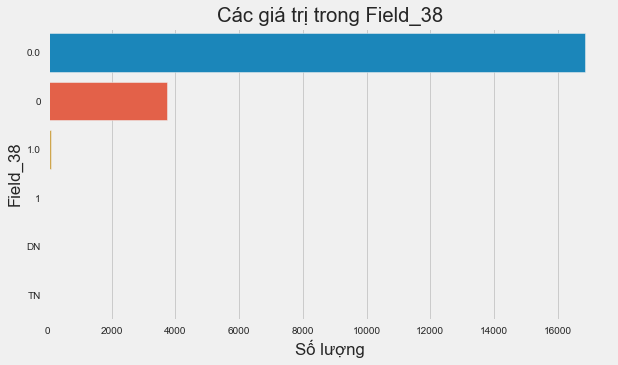

In [123]:
#Xem lại Field_38
plt.subplots(figsize=(9,5))
sns.countplot(y="Field_38", data=df_train,order=df_train["Field_38"].value_counts().index)
plt.title("Các giá trị trong Field_38")
plt.xlabel("Số lượng")
plt.show();

In [124]:
def prepare_process_V(df):
    df = str(df).strip().lower()
    df = re.sub(' + ', ' ', df)
    return df

def process_V_cols(df):
    # mã hóa lại các cột sau:
    df['Field_62'] = df['Field_62'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5})
    df['Field_47'] = df['Field_47'].map({'Zezo': 0, 'One': 1, 'Tw0': 2, 'Three': 3, 'Four': 4})
    
    # xử lí các cột có nhiều số 0.0
    df["Field_27"] = df["Field_27"].replace({0.0: np.nan})
    df["Field_28"] = df["Field_28"].replace({0.0: np.nan})
    df["Field_19"] = df["Field_19"].replace({0.0: np.nan})
    df["Field_29"] = df["Field_29"].replace({0.0: np.nan})
    
    # xử lí biến categorical
    df['friendCount'] = df['friendCount'].replace(0.0, np.nan, inplace=True)
    df['subscriberCount'] = df['subscriberCount'].replace(0.0, np.nan, inplace=True)
    
    #xử lí field_38
    df['Field_38'] = df['Field_38'].map({0: 0.0, 1: 1.0, 'DN': np.nan, 'TN': np.nan })
    
    for col in df.columns:
        if df[col].dtype.name == 'object':
            df[col] = df[col].apply(prepare_process_V).astype('category')
    
    return df

In [125]:
#Drop những cột không cần thiết
drop = ['Field_14', 'Field_16', 'Field_17', 'Field_24', 'Field_26', 'Field_30', 'Field_31', 'Field_37', 'Field_52',
        'Field_57', 'partner0_B', 'partner0_K', 'partner0_L', 'partner1_B', 'partner1_D', 'partner1_E', 'partner1_F',
        'partner1_K', 'partner1_L', 'partner2_B', 'partner2_G', 'partner2_K', 'partner2_L', 'partner3_B', 'partner3_F',
        'partner3_G', 'partner3_H', 'partner3_K', 'partner3_L', 'partner4_A', 'partner4_B', 'partner4_C', 'partner4_D',
        'partner4_E', 'partner4_F', 'partner4_G', 'partner4_H', 'partner4_K', 'partner4_L', 'partner5_B', 'partner5_C',
        'partner5_H', 'partner5_K', 'partner5_L', 'Field_34', 'info_social_sex', 'data.basic_info.locale', 'homeTownCountry',
        'Field_2', 'Field_5', 'Field_49', 'Field_9', 'gioiTinh', 'ngaySinh', 'namSinh']

def transform(df):
    df = process_nhom_I_cols(df)
    df = process_II_cols(df)
    df = process_III_cols(df)
    df = process_IV_cols(df)
    df = process_V_cols(df)
    return df.drop(drop, 1)

In [145]:
# kết nối lại tất cả các feature lại với nhau
all_data = transform(df_all.copy())

In [147]:
df_all_mis = missing_values(all_data)

Có tất cả 138 cột.
Có tất cả 11 cột bị thiếu data


In [148]:
df_all_mis

,Thiếu,Chiếm %
Field_28,23414,44.2
Field_27,23330,44.0
Field_19,22583,42.6
homeTownLatitude,11546,21.8
homeTownLongitude,11546,21.8
currentLocationLatitude,10391,19.6
currentLocationLongitude,10391,19.6
Field_29,8969,16.9
Field_38,3768,7.1
Field_47,1786,3.4


In [158]:
all_data.drop(['Field_28', 'Field_27', 'Field_19', 'homeTownLatitude', 'homeTownLongitude',
              'currentLocationLatitude', 'currentLocationLongitude', 'Field_29', 'Field_38',
              'Field_47', 'Field_62'], axis=1)

,Field_3,Field_10,Field_13,Field_20,Field_21,Field_22,Field_23,Field_39,Field_41,Field_42,...,E_startDate,E_endDate,C_startDate,C_endDate,G_startDate,G_endDate,A_startDate,A_endDate,brief,Giới Tính
0,1.000000,1.000000,1.0,4.258600e+06,4.500000,1.000000,16.00000,1.000000,1.000000,1.000000,...,08-2019,08-2019,10-2019,12-2019,10-2019,10-2019,06-2019,08-2019,cb1,male
1,1.538687,1.096542,1.0,3.603181e+06,4.485331,0.999452,31.47254,0.809537,0.762205,0.748709,...,08-2019,08-2019,10-2019,12-2019,10-2019,10-2019,07-2019,07-2019,4,male
2,2.000000,1.000000,1.0,5.000000e+06,4.500000,1.000000,10.00000,1.000000,1.000000,1.000000,...,08-2019,09-2019,10-2019,12-2019,10-2019,10-2019,09-2019,11-2019,1,female
3,1.538687,1.096542,1.0,3.603181e+06,4.485331,0.999452,31.47254,0.809537,0.762205,0.748709,...,08-2019,08-2019,10-2019,12-2019,10-2019,10-2019,09-2019,11-2019,1,male
4,1.538687,1.096542,1.0,3.603181e+06,4.485331,0.999452,31.47254,0.809537,0.762205,0.748709,...,08-2019,08-2019,10-2019,12-2019,10-2019,10-2019,09-2019,11-2019,1,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53025,1.000000,1.000000,1.0,1.490000e+06,4.500000,1.000000,5.00000,1.000000,1.000000,1.000000,...,12-2019,12-2019,12-2019,12-2019,10-2019,10-2019,06-2019,12-2019,1,female
53026,1.538687,1.096542,1.0,3.603181e+06,4.485331,0.999452,31.47254,0.809537,0.762205,0.748709,...,08-2019,08-2019,10-2019,12-2019,02-2020,02-2020,01-2020,03-2020,notfound,male
53027,2.000000,1.000000,1.0,4.015000e+06,4.500000,1.000000,0.00000,1.000000,0.000000,0.000000,...,08-2019,08-2019,10-2019,12-2019,10-2019,10-2019,09-2019,11-2019,notfound,female
53028,1.538687,1.096542,1.0,3.603181e+06,4.485331,0.999452,31.47254,0.809537,0.762205,0.748709,...,08-2019,08-2019,10-2019,12-2019,10-2019,10-2019,01-2020,01-2020,notfound,male


In [162]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.label.values

train = all_data[:ntrain]
test = all_data[ntrain:]


In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train, y_train, test_size = 0.3, random_state = 200)
print("X Training shape", X_train.shape)
print("X Testing shape", X_test.shape)
print("Y Training shape", Y_train.shape)
print("Y Testing shape", Y_test.shape)

X Training shape (37121, 138)
X Testing shape (15909, 138)
Y Training shape (37121,)
Y Testing shape (15909,)


In [161]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, GridSearchCV

logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict_proba(X_test)[:,1]

#Y_pred_proba = logreg.predict_proba(X_test)

print('Train/Test split results:')
#print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, Y_pred))
print("ROC",  roc_auc_score(Y_test, Y_pred))
#print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

ValueError: could not convert string to float: 'male'